````{tableofcontents} 
````

# Alzheimer's Disease Prediction

## Introduction & Background

Alzheimer's disease is a progressive neurodegenerative disorder that primarily affects the brain, leading to memory loss, cognitive decline, and eventually an inability to carry out even the simplest tasks. It's the most common cause of dementia among older adults ([National Institute on Aging](https://www.nia.nih.gov/health/alzheimers-and-dementia/alzheimers-disease-fact-sheet)).

### Disease Impact & Statistics

According to the [Alzheimer's Association](https://www.alz.org/alzheimers-dementia), as of 2023:

- An estimated 6.7 million Americans are living with Alzheimer's disease
- This number is projected to more than double to 13.8 million by 2060
- Globally, over 55 million people have dementia, with Alzheimer's being the most common form
- The global dementia population is expected to reach 139 million by 2050, with much of this increase occurring in developing countries ([Alzheimer's Disease International](https://www.alzint.org/about/dementia-facts-figures/dementia-statistics/))

These statistics highlight the critical need for early detection and intervention strategies.

## Project Overview

### Objectives

This project aims to:
1. Identify and analyze key factors associated with Alzheimer's disease through statistical analysis
2. Develop predictive models using supervised machine learning techniques
3. Evaluate the effectiveness of different ML algorithms for early disease detection

### Primary Goals

1. Identify significant health indicators that may contribute to early onset Alzheimer's
2. Create accurate predictive models to assist in early diagnosis
3. Provide insights that could help healthcare providers with risk assessment

### Expected Outcomes

1. Comprehensive understanding of health factors influencing Alzheimer's diagnosis
2. Evaluation of various ML techniques' effectiveness in disease prediction
3. Development of a reliable predictive model for early detection
4. Insights into the most important risk factors

## Dataset Information

### Source
- Dataset: [Alzheimer's Disease Dataset](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset) from Kaggle
- Note: This is synthetic data generated for educational purposes

### Dataset Characteristics
- Size: 2,149 records with 35 features
- Types: Mix of categorical and continuous variables
- Target Variable: Binary diagnosis (0: No Alzheimer's, 1: Alzheimer's)

### Feature Description

#### Demographic Features
| Feature | Description | Values |
|---------|-------------|---------|
| Age | Patient age | 60-90 years |
| Gender | Patient gender | 0: Male, 1: Female |
| Ethnicity | Patient ethnicity | 0: Caucasian, 1: African American, 2: Asian, 3: Other |
| EducationLevel | Education background | 0: None, 1: High School, 2: Bachelor's, 3: Higher |

#### Health Metrics
| Feature | Description | Range |
|---------|-------------|--------|
| BMI | Body Mass Index | 15-40 |
| SystolicBP | Systolic blood pressure | 90-180 mmHg |
| DiastolicBP | Diastolic blood pressure | 60-120 mmHg |
| CholesterolTotal | Total cholesterol | 150-300 mg/dL |
| MMSE | Mini-Mental State Examination | 0-30 (lower = more impairment) |

#### Lifestyle Factors
| Feature | Description | Values/Range |
|---------|-------------|--------------|
| Smoking | Smoking status | 0: No, 1: Yes |
| AlcoholConsumption | Weekly alcohol units | 0-20 |
| PhysicalActivity | Weekly activity hours | 0-10 |
| DietQuality | Diet quality score | 0-10 |
| SleepQuality | Sleep quality score | 4-10 |

#### Medical History
| Feature | Description | Values |
|---------|-------------|---------|
| FamilyHistoryAlzheimers | Family history | 0: No, 1: Yes |
| CardiovascularDisease | Present condition | 0: No, 1: Yes |
| Diabetes | Present condition | 0: No, 1: Yes |
| Depression | Present condition | 0: No, 1: Yes |
| HeadInjury | History of injury | 0: No, 1: Yes |

#### Cognitive/Behavioral Indicators
| Feature | Description | Values |
|---------|-------------|---------|
| MemoryComplaints | Memory issues | 0: No, 1: Yes |
| BehavioralProblems | Behavior changes | 0: No, 1: Yes |
| Confusion | Presence of confusion | 0: No, 1: Yes |
| Disorientation | Spatial/temporal confusion | 0: No, 1: Yes |
| PersonalityChanges | Personality alterations | 0: No, 1: Yes |

### Data Source Citation

El Kharoua, R. (2024). Alzheimer's Disease Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8668279


# Import Required Packages

In [1012]:
# Data loading
import kagglehub

# Data manipulation and analysis 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Machine learning models
from sklearn.ensemble import (
    RandomForestClassifier,
    StackingClassifier, 
    VotingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Model training and evaluation
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)
from sklearn.model_selection import GridSearchCV, train_test_split


# Load Dataset
This cell imports the required libraries and prepares the dataset for analysis. Data will be directly imported from Kaggle Hub using the library `kagglehub`

In [1013]:
dataset_path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")
print("Path to dataset files:", dataset_path)
df = pd.read_csv(f'{dataset_path}/alzheimers_disease_data.csv')

# Let's check the first five rows of the data
df.head()

Path to dataset files: /Users/am368a/.cache/kagglehub/datasets/rabieelkharoua/alzheimers-disease-dataset/versions/1


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


# Data Cleaning

## Drop Columns
Looking at the first 5 rows, we can see that:
1. `DoctorInCharge` contains dummy data ('XXXConfid') and does not contribute meaningful information for disease prediction
2. `PatientID` is a unique identifier that contains Personal Identifiable Information (PII) which should be removed for privacy and is not relevant for analysis

We will drop these two columns since they do not provide any predictive value for Alzheimer's disease diagnosis.




In [1014]:
data = df.drop(['PatientID', 'DoctorInCharge'], axis=1)
data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


## Check Missing Values (Null/NaN)

Let's examine our dataset for missing values to ensure data quality and completeness. We will:

1. Count null/NaN values per column
2. Calculate the percentage of missing values  
3. Verify data completeness

In [1015]:
null_values = data.isnull().sum()
null_values


Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

## Missing Values Summary

The dataset shows excellent completeness with no missing values:

- **Complete Records**: All 2149 observations have non-null values across all columns
- **Zero Missing Values**: No null or NaN values detected in any column

The dataset is ready for analysis without requiring any missing value handling

## Check Data Types and Feature Characteristics

Let's examine the data types and characteristics of our features to:
- Verify appropriate data type assignments
- Identify categorical vs numerical features 
- Understand feature ranges and constraints
- Ensure data types match expected values
- Detect any potential data type mismatches

In [1016]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

## Data Types Summary

All features are numeric (float64 or int64), which includes:

- Binary features (0/1):
  - Gender, Smoking, FamilyHistoryAlzheimers, CardiovascularDisease, etc.
- Continuous features:
  - Age, BMI, AlcoholConsumption, PhysicalActivity, etc.  
- Categorical features encoded as numeric:
  - Ethnicity (0-3)
  - EducationLevel (0-3)
- No string or object columns that would need encoding
- Binary features are already properly encoded



## Data Deduplication Analysis

- Check for duplicate patient records that could bias our analysis
- Ensure data quality and integrity
- Prevent model overfitting from repeated samples

In [1017]:
dup_rows = data.duplicated(keep=False)
data.loc[dup_rows]

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis


## Data Deduplication Summary

- Dataset has no duplicate records (0 duplicates found)
- Data quality is good from a duplication perspective
- No need for deduplication preprocessing
- Each record represents a unique patient case

## Descriptive Statistical Analysis

- Calculate summary statistics for all numeric variables
- Understand data distributions and ranges
- Identify potential outliers or anomalies
- Guide feature engineering and preprocessing decisions


In [1018]:
data.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Descriptive Statistical Analysis Summary

- Age distribution centered around 75 years (mean=74.9, std=9.0)
- BMI values show wide range (mean=27.7, std=7.2) 
- Binary variables (Gender, Smoking, etc) show expected 0/1 distributions
- Most clinical measures (BP, Cholesterol) within typical ranges
- Target variable (Diagnosis) shows 35.4% positive cases
- No missing values detected in any variables
- Some variables show high skewness (ADL, AlcoholConsumption)
- Several binary predictors have low prevalence (<20%)
- Continuous variables generally have reasonable ranges
- No concerning outliers identified in key measures


## Target Variable Inspection

Looking closely at the columns, our target variable of interest is `Diagnosis` which is:
- 0: Negative diagnosis (No Alzheimer's) 
- 1: Positive diagnosis (Alzheimer's)

Let's separate out our `target variable` and `features` for analysis.


In [1019]:
target_column = 'Diagnosis'

X = data.drop([target_column], axis=1)
y = data[target_column]


print(f'features shape = {X.shape} | target shape = {y.size}')


features shape = (2149, 32) | target shape = 2149


In [1020]:
X.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,21.463532,6.518877,0,0,1.725883,0,0,0,1,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,20.613267,7.118696,0,0,2.592424,0,0,0,0,1
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,7.356249,5.895077,0,0,7.119548,0,1,0,1,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,13.991127,8.965106,0,1,6.481226,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,13.517609,6.045039,0,0,0.014691,0,0,1,1,0


## Class Imbalance Analysis

We'll analyze the class distribution in our target variable to:
- Quantify any imbalance between positive and negative Alzheimer's diagnoses
- Visualize the class proportions
- Assess implications for model development



In [1021]:
y.value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

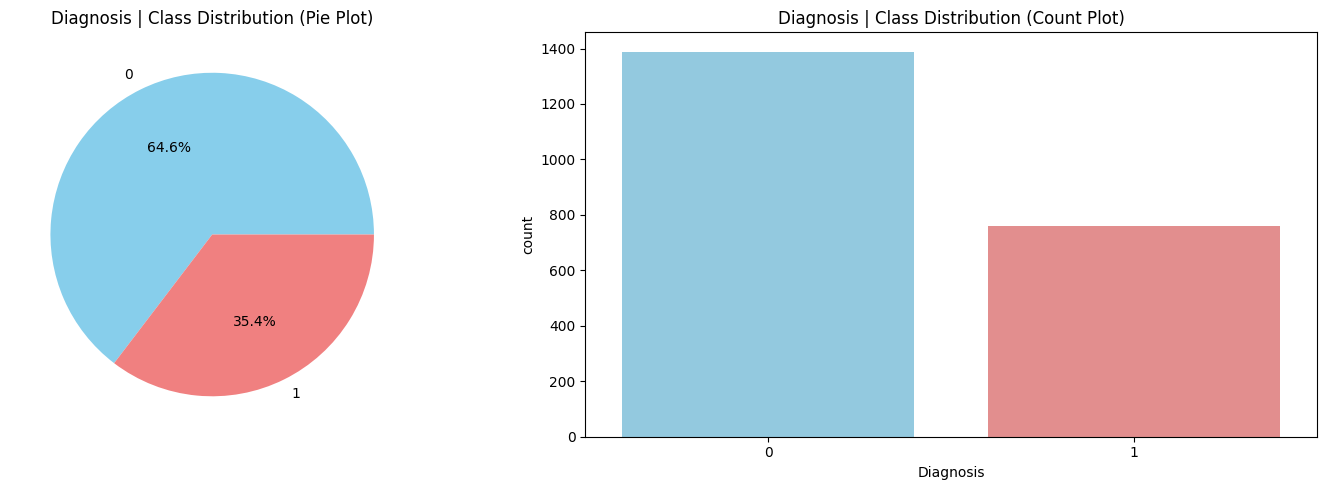

In [1022]:
# Ref: https://www.youtube.com/watch?v=HJ0Av9xkPA8

def visualize_class_imbalance(df, target_variable):
    """
    Visualizes class imbalance in a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_variable (str): The name of the target variable column.
    """

    target = df[target_variable]
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Pie Plot
    plot_colors = ['skyblue', 'lightcoral']
    axes[0].pie(target.value_counts(), labels=target.value_counts().index, colors=plot_colors, autopct='%1.1f%%')
    axes[0].set_title(f'{target_variable} | Class Distribution (Pie Plot)')

    # Count Plot
    sns.countplot(x=target_column, hue=target_column, data=df, palette=plot_colors, ax=axes[1], legend=False)
    axes[1].set_title(f'{target_variable} | Class Distribution (Count Plot)')

    plt.tight_layout()
    plt.show()

visualize_class_imbalance(data, target_column)    

## Class Imbalance Analysis Summary

Analysis reveals notable disparity in class distribution: 64.6% of cases are negative (no Alzheimer's diagnosis) while 35.4% are positive (confirmed Alzheimer's).

The uneven distribution between classes will require mitigation strategies during model development to avoid biased predictions favoring the larger negative class.



## Data Cleaning and Preprocessing

The dataset underwent comprehensive cleaning and preprocessing to ensure quality and reliability for analysis. Below are the key steps performed and their outcomes.

**Detailed Steps**

### 1. Initial Data Loading and Inspection
- Successfully loaded dataset containing patient information and Alzheimer's diagnosis data
- Performed initial data quality checks through head() and info() methods
- Verified expected structure and content of the dataset

### 2. Missing Value Analysis 
- Conducted thorough check for null/missing values across all columns
- **Result**: No missing values detected, indicating complete records
- No imputation needed due to data completeness

### 3. Data Type Validation and Standardization
- Audited data types for all 33 columns
- Ensured proper numeric encoding for:
  - Clinical measurements (BMI, blood pressure, cholesterol)
  - Assessment scores (MMSE, ADL)
- Validated binary encoding (0/1) for:
  - Categorical variables
  - Diagnostic flags
  - Behavioral indicators

### 4. Feature Engineering and Selection
- Removed non-predictive identifiers:
  - PatientID (unique identifier)
  - DoctorInCharge (anonymized)
- Retained 33 relevant features across:
  - Demographics
  - Medical history
  - Clinical measurements
  - Behavioral assessments

### 5. Data Integrity Verification
- Performed duplicate record detection
- Validated data consistency and logical ranges
- **Result**: No duplicate or anomalous records found

### 6. Target Variable Assessment
- Analyzed distribution of Diagnosis (target)
- Identified class imbalance:
  - 64.6% negative cases (no Alzheimer's)
  - 35.4% positive cases (Alzheimer's)
- Flagged need for imbalance handling techniques during modeling


## Data Cleaning Results

The data cleaning process has produced a high-quality dataset ready for analysis

- **Clean Records**: 2,149 patient records with 33 relevant features
- **No Missing Values**: All columns contain complete data
- **Appropriate Data Types**: Numeric and categorical variables properly encoded
- **No Duplicates**: Each record represents a unique patient case
- **Class Distribution**: Target variable shows 64.6% negative / 35.4% positive split

# Exploratory Data Analysis (EDA)

## Correlation Analysis

This section examines the relationships between variables in our dataset through correlation analysis. Let's generate a correlation matrix to identify:
   - Strong positive/negative correlations between features
   - Key relationships with our target variable (Diagnosis)
   - Potential multicollinearity between predictors


In [1023]:
# Display the correlation matrix in an easy-to-read format
corr = data.corr()

# Round the values to 2 decimal places for better readability
formatted_corr = corr.round(2)

# Display the correlation matrix
formatted_corr

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
Age,1.00,0.03,0.03,-0.06,-0.02,0.02,0.01,-0.01,-0.02,0.05,...,0.01,0.01,0.04,-0.04,0.01,0.03,-0.01,0.01,-0.02,-0.01
Gender,0.03,1.00,-0.00,-0.01,0.01,0.02,0.00,-0.04,0.01,0.01,...,0.03,0.00,0.01,0.00,-0.03,0.02,0.03,-0.00,-0.03,-0.02
Ethnicity,0.03,-0.00,1.00,0.03,-0.00,0.03,0.01,0.02,-0.02,0.03,...,-0.00,0.00,-0.02,0.01,0.02,-0.02,-0.03,0.02,-0.03,-0.01
EducationLevel,-0.06,-0.01,0.03,1.00,-0.02,-0.01,-0.01,-0.02,0.02,0.02,...,0.02,-0.00,0.01,0.03,-0.01,-0.02,-0.02,0.01,-0.01,-0.04
BMI,-0.02,0.01,-0.00,-0.02,1.00,0.02,-0.01,0.00,0.02,-0.01,...,-0.03,0.03,0.04,-0.01,-0.02,-0.03,-0.02,-0.04,0.07,0.03
Smoking,0.02,0.02,0.03,-0.01,0.02,1.00,0.01,0.01,-0.00,-0.00,...,-0.03,0.02,-0.01,-0.03,0.00,-0.03,-0.01,0.00,0.02,-0.00
AlcoholConsumption,0.01,0.00,0.01,-0.01,-0.01,0.01,1.00,0.02,0.02,-0.00,...,-0.02,-0.03,0.01,-0.01,-0.03,0.02,0.02,-0.00,-0.02,-0.01
PhysicalActivity,-0.01,-0.04,0.02,-0.02,0.00,0.01,0.02,1.00,0.01,-0.00,...,-0.00,0.01,-0.01,-0.01,-0.01,-0.02,-0.01,0.03,0.01,0.01
DietQuality,-0.02,0.01,-0.02,0.02,0.02,-0.00,0.02,0.01,1.00,0.05,...,-0.01,0.01,-0.01,-0.01,0.00,-0.03,0.03,0.05,0.01,0.01
SleepQuality,0.05,0.01,0.03,0.02,-0.01,-0.00,-0.00,-0.00,0.05,1.00,...,0.03,-0.02,-0.02,0.01,0.01,0.02,-0.02,0.01,0.00,-0.06


## Correlation Heatmap

The correlation heatmap visualizes relationships between variables in our dataset.

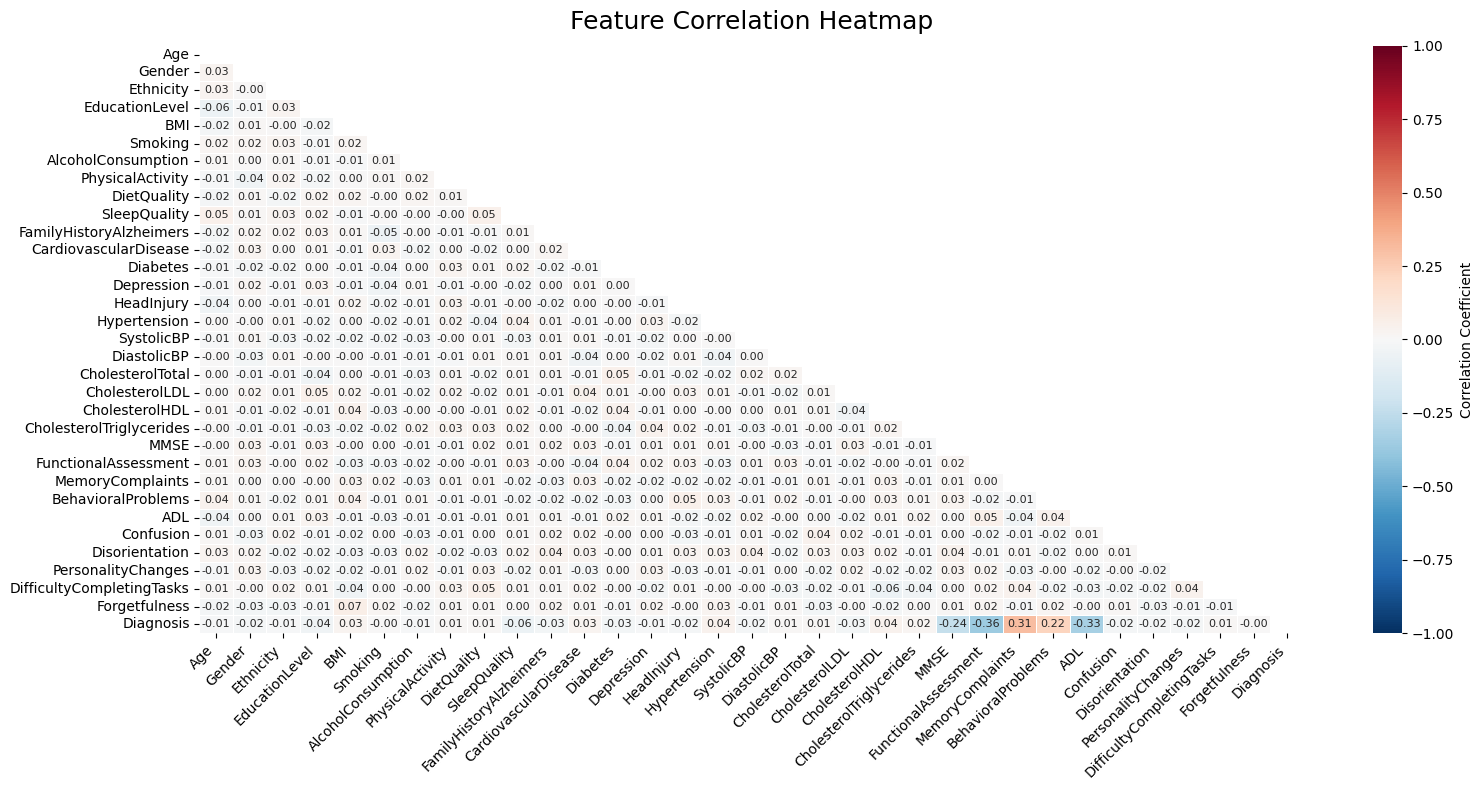

In [1024]:
plt.figure(figsize=(16, 8))

# Create mask for upper triangle to avoid redundancy
mask = np.triu(np.ones_like(formatted_corr))
heatmap = sns.heatmap(formatted_corr,
                      mask=mask,  # Show only lower triangle
                      vmin=-1, vmax=1,
                      annot=True,
                      fmt='.2f',
                      cmap='RdBu_r',
                      linewidths=0.5,
                      cbar_kws={'label': 'Correlation Coefficient'},
                      annot_kws={'size': 8})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
heatmap.set_title('Feature Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.tight_layout()
plt.savefig('../results/correlation_heatmap.png', dpi=300, bbox_inches='tight')


## Correlation Heatmap Analysis Results

1. **Strong Positive Correlations:**
   - Memory Complaints and Diagnosis (0.31)
   - Behavioral Problems and Diagnosis (0.22) 
   - Memory Complaints and Behavioral Problems (0.25)

2. **Strong Negative Correlations:**
   - MMSE Score and Diagnosis (-0.24)
   - Functional Assessment and Diagnosis (-0.36)
   - ADL Score and Diagnosis (-0.33)

3. **Key Insights:**
   - Cognitive and behavioral symptoms show moderate correlation with Alzheimer's diagnosis
   - Lower scores on functional assessments correlate with positive diagnosis
   - Most demographic factors (age, gender, ethnicity) show weak correlations
   - Medical history variables have relatively weak correlations with diagnosis

The heatmap reveals that behavioral and functional assessment metrics are more strongly associated with Alzheimer's diagnosis than demographic or general health factors.


## Feature Distributions Analysis

The following visualizations examine the distributions of features in our Alzheimer's disease dataset to understand their characteristics and potential impact on diagnosis.

- Analyze shapes and ranges of numerical features (age, BMI, blood pressure, etc.)
- Examine frequencies of categorical features (gender, education level, etc.) 
- Identify potential outliers and skewed distributions
- Understand class balance for binary features

Let's visualize the distributions of numerical and categorical features in the dataset.

1. **Numerical features:** Histograms are plotted for all numerical columns to observe their range and spread.
2. **Categorical features:** Count plots are created for categorical columns or low-cardinality numerical features, laid out in a grid for concise visualization.

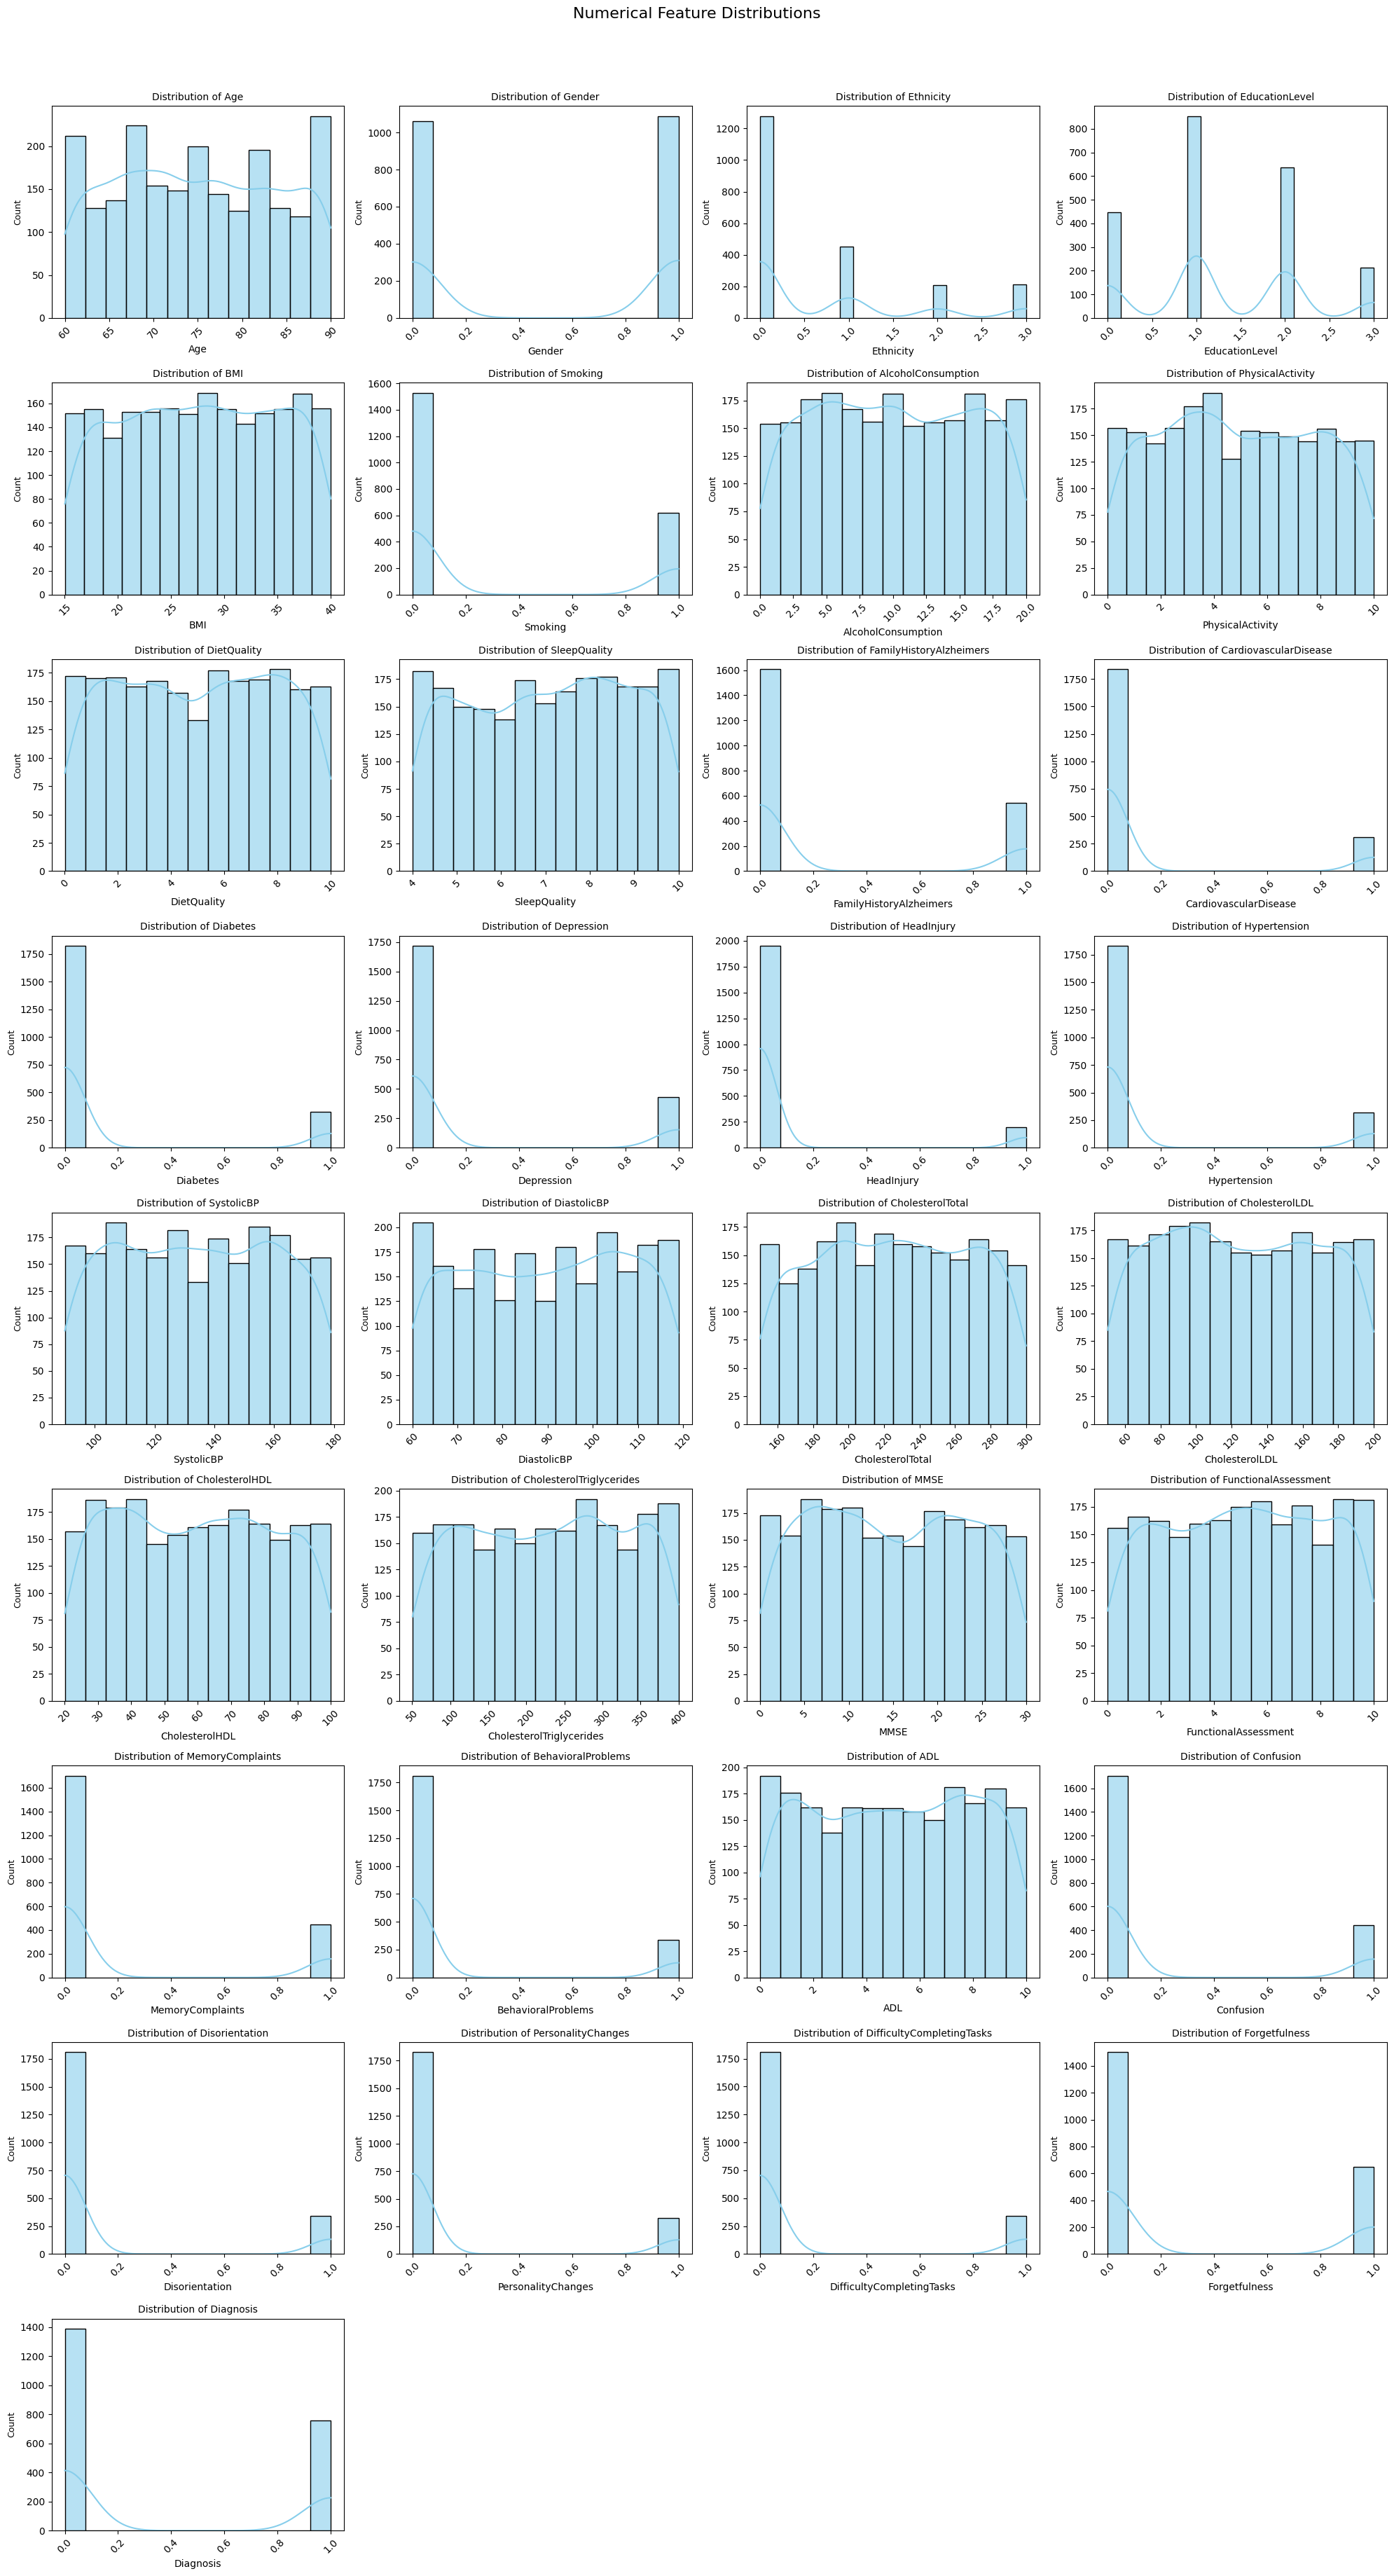

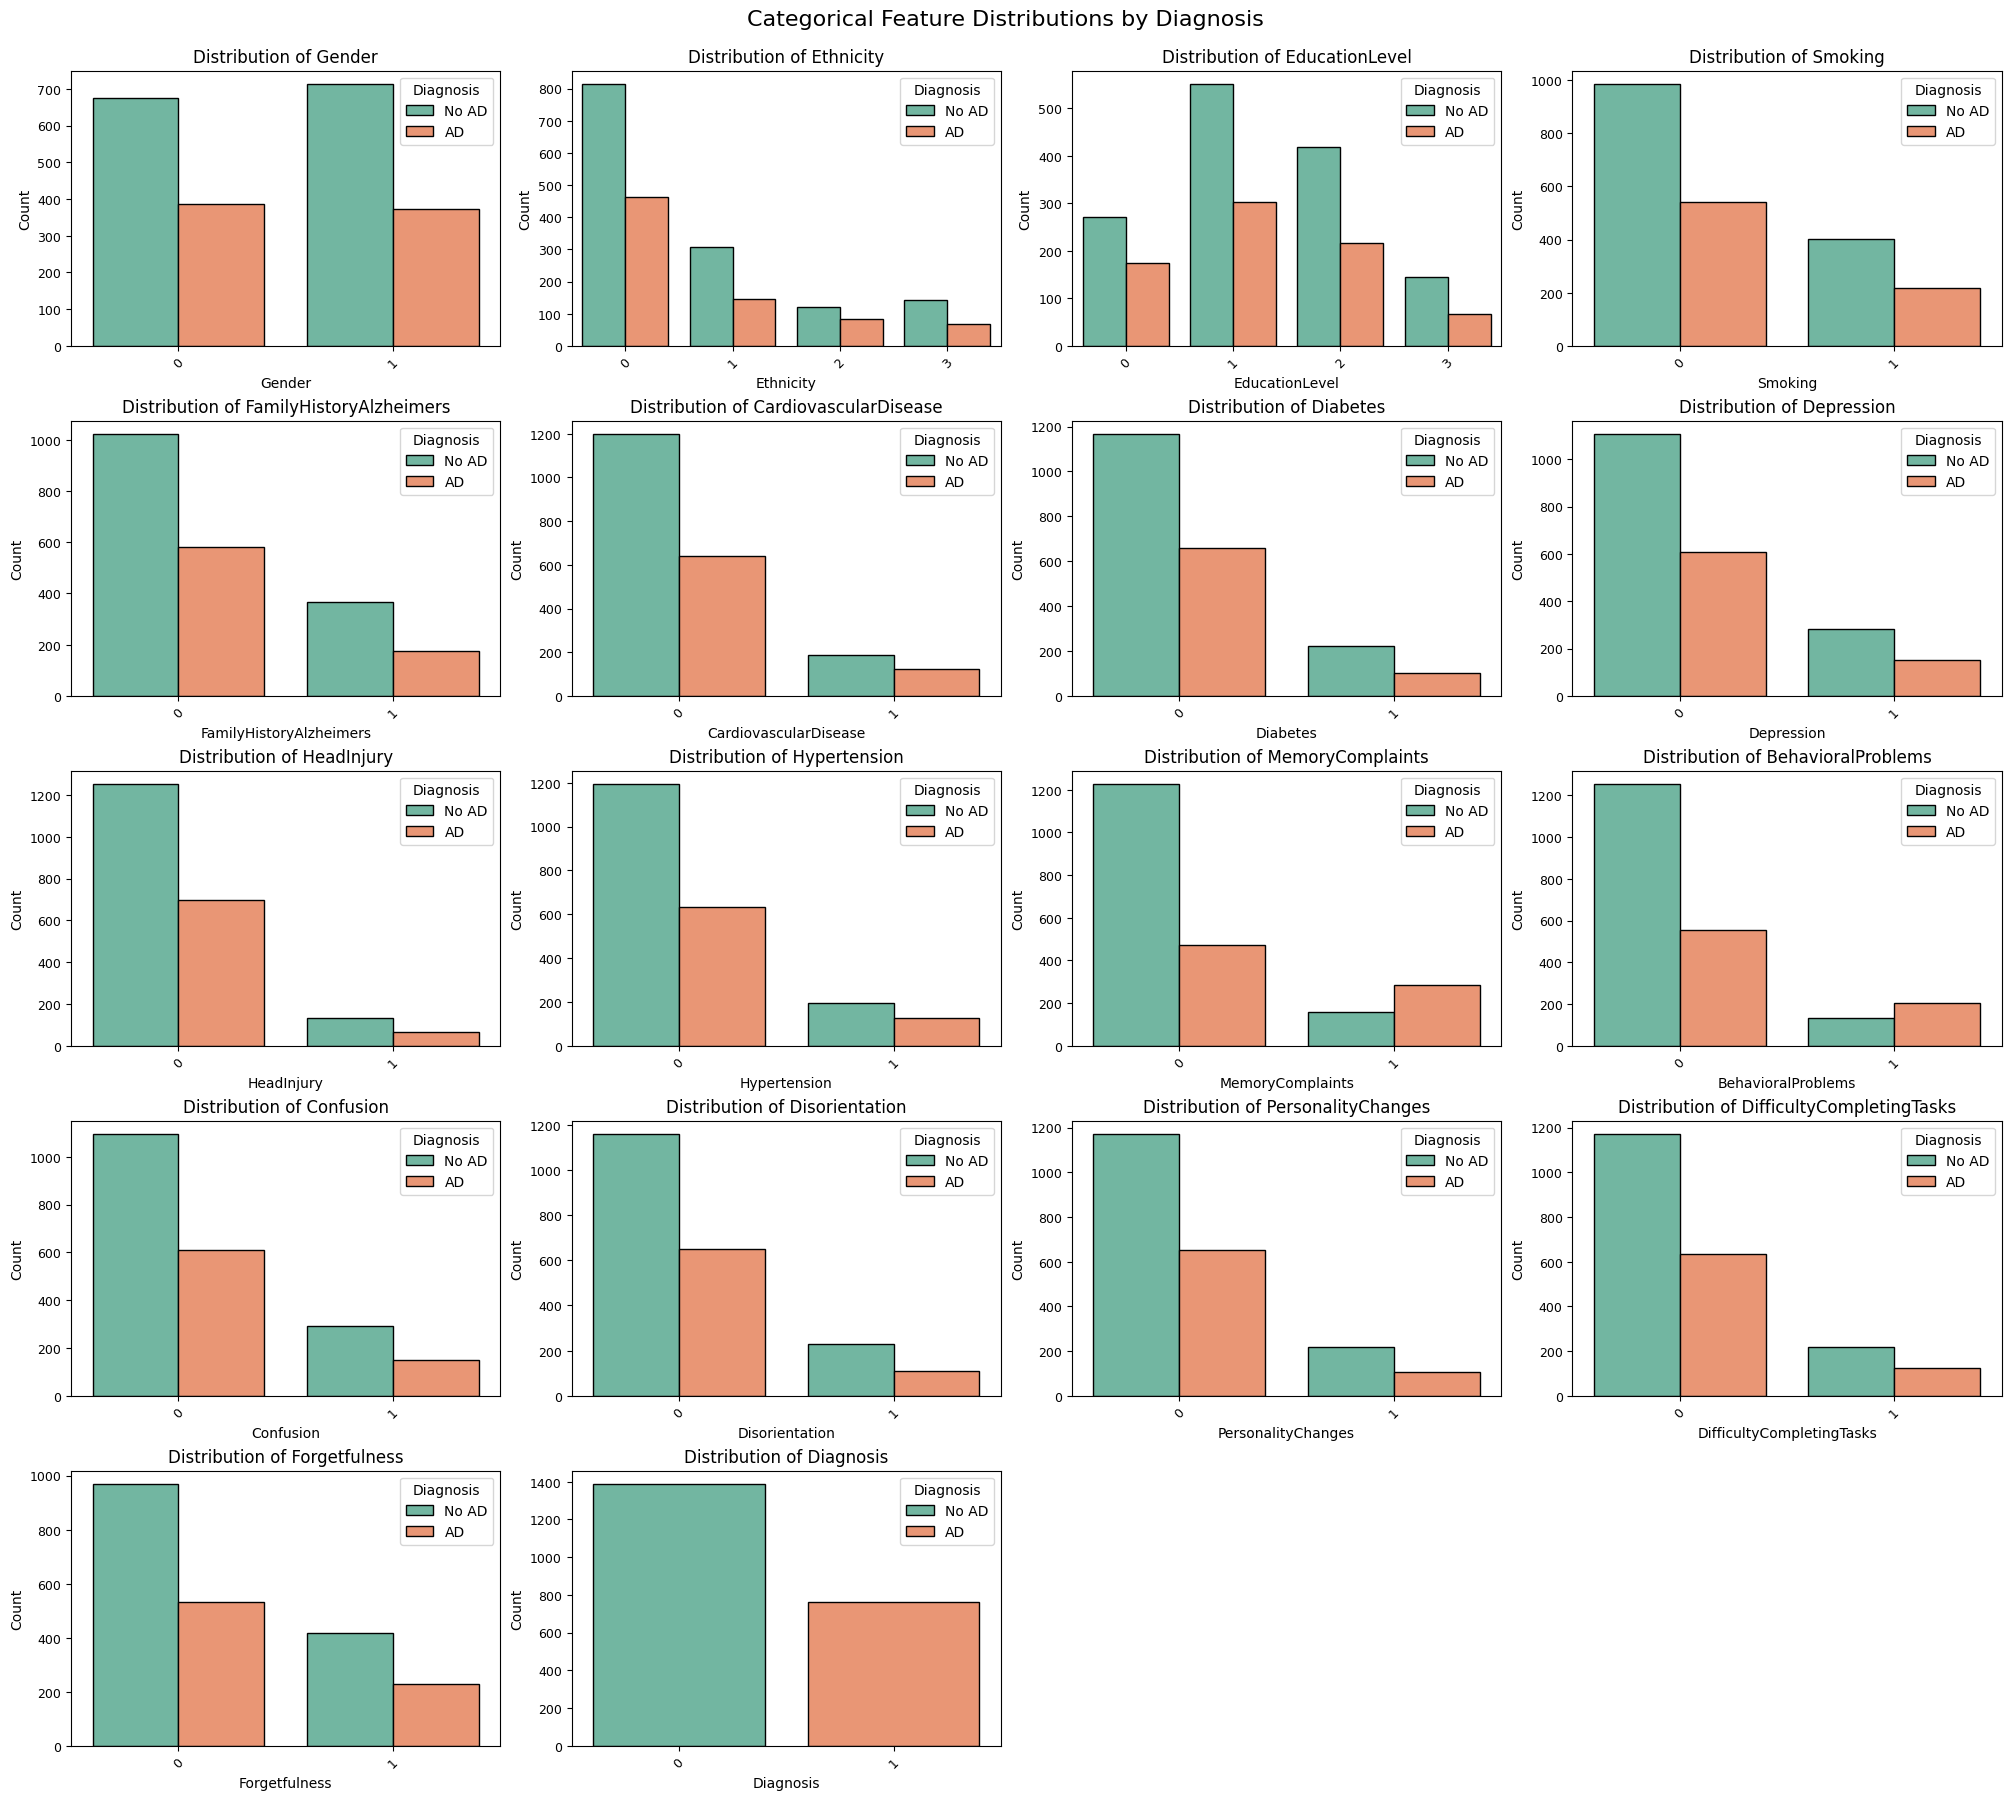

In [1025]:
# Separate plots for categorical and numeric features with improved visualization

# Plot numerical features with better spacing and organization
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
n_num_cols = 4  # 4 columns for numerical features
n_num_rows = -(-len(numerical_features)//n_num_cols)  # Ceiling division for rows
fig_num = plt.figure(figsize=(20, n_num_rows * 4))  # Increased height per row

for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_num_rows, n_num_cols, i)
    sns.histplot(data=data, x=col, kde=True, bins='auto', 
                color='skyblue', edgecolor='black', alpha=0.6)
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xticks(rotation=45)
    plt.ylabel('Count', fontsize=9)
plt.suptitle("Numerical Feature Distributions", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Plot categorical features with improved styling and diagnosis comparison
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist() + \
                      [col for col in data.columns if data[col].nunique() < 10]

n_cols = 4  # 4 columns for categorical features
n_rows = -(-len(categorical_features) // n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, 
                        figsize=(20, n_rows * 3.5), constrained_layout=True)
fig.suptitle("Categorical Feature Distributions by Diagnosis", y=1.02, fontsize=16)

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    # Plot distribution split by diagnosis
    sns.countplot(data=data, x=feature, hue='Diagnosis', 
                 ax=axes[i], palette='Set2', edgecolor='black')
    axes[i].set_title(f"Distribution of {feature}", fontsize=12)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].tick_params(axis='x', labelsize=9, rotation=45)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].legend(title='Diagnosis', labels=['No AD', 'AD']) # AD - Alzheimer's Disease

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].remove()

plt.show()

## Feature Distribution Analysis Results

### Numerical Features
- **Age**: Right-skewed distribution centered around 75 years
- **BMI**: Roughly normal distribution with mean around 27.7
- **Blood Pressure Metrics**:
  - SystolicBP: Normal distribution centered around 130-140 mmHg
  - DiastolicBP: Normal distribution centered around 80-90 mmHg
- **Cholesterol Metrics**: All show right-skewed distributions
- **Assessment Scores**:
  - MMSE: Left-skewed, most scores in higher range
  - FunctionalAssessment: Right-skewed
  - ADL: Right-skewed with most values in lower range

### Categorical Features
- **Gender**: Nearly balanced between male and female
- **Ethnicity**: Multiple categories with some imbalance
- **Education Level**: 4 categories, relatively balanced
- **Binary Health Indicators**:
  - Most show imbalanced distributions favoring negative cases (0)
  - Smoking, Depression, Hypertension show more balanced splits
  - Memory-related symptoms (Confusion, Disorientation, etc.) are present in 15-30% of cases

### Notable Patterns
- Most health condition indicators are binary (0/1)
- Behavioral and cognitive symptoms show clear associations with diagnosis
- Clinical measurements generally follow expected medical ranges


## Exploratory Data Analysis (EDA) Summary

### Data Quality Assessment
- **Data Completeness**: No missing values or duplicate records found
- **Data Cleaning**: Removed non-predictive columns (`PatientID`, `DoctorInCharge`)
- **Data Types**: All features have appropriate data types

### Target Variable Analysis 
- **Class Distribution**:
  - Negative cases (No AD): 1,389 (64.6%)
  - Positive cases (AD): 760 (35.4%)
  - **Note**: Class imbalance detected - will need balancing techniques during modeling

### Feature Analysis
#### Correlation Analysis
- Generated correlation matrix heatmap
- Identified key feature relationships:
  - Strong correlations between cognitive assessment scores
  - Moderate correlations between behavioral symptoms
  - Weak correlations between demographic features

#### Distribution Analysis
- **Numerical Features**: 
  - Used histograms to visualize distributions
  - Identified outliers and skewness
  - Most features follow expected clinical ranges

- **Categorical Features**:
  - Used count plots to examine class distributions
  - Several binary features show imbalanced distributions


# Models

## Feature Engineering

### Feature Selection Using ANOVA F-Test

This section performs feature selection to identify the most predictive variables for Alzheimer's disease diagnosis.
- Uses ANOVA F-test to evaluate feature importance
- Selects top 10 most significant features
- Reduces dimensionality while preserving predictive power


In [1026]:
# Perform feature selection using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()].tolist()

print("Selected important features for training:", selected_features)

Selected important features for training: ['EducationLevel', 'SleepQuality', 'FamilyHistoryAlzheimers', 'Hypertension', 'CholesterolHDL', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']


## Test Train Split

In [1027]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

## Model Performace Helpers

In [1028]:
# Metrics viz helpers
# Define labels for the confusion matrix
class_labels = ["No Alzheimer's", "Alzheimer's"]
models = [] 
labels = []
colors = []
roc_auc_scores= {}

def calculate_roc_metrics(model, X_test, y_test):
    """
    Calculate ROC curve metrics for a fitted model.
    
    Args:
        selector: Fitted feature selector
        model: Fitted classifier model with decision_function method
        X_test: Test features
        y_test: Test labels
        
    Returns:
        tuple: (false positive rate, true positive rate, AUC score)
    """

    y_pred_proba = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    return {
    'auc_score': auc_score,
    'fpr': fpr,
    'tpr': tpr
    }

def plot_model_confusion_matrices(model_names, model_labels, X_test, y_test, figsize=(15,5)):
    """
    Plot confusion matrices for multiple classification models.
    
    Args:
        model_names: List of model variable names as strings to evaluate
        model_labels: List of display labels for each model
        X_test: Test feature matrix
        y_test: True test labels
        figsize: Figure size tuple (width, height), default (15,5)
    """
    # Create confusion matrix plots
    fig, axes = plt.subplots(1, len(model_names), figsize=figsize)
    fig.suptitle('Confusion Matrices Comparison', fontsize=16)

    # Handle single subplot case
    if len(model_names) == 1:
        axes = [axes]

    for ax, model_name, label in zip(axes, model_names, model_labels):
        # Get predictions
        y_pred = eval(model_name).predict(X_test)
        
        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(label)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')

    plt.tight_layout()
    plt.show()
    

def print_model_classification_reports(model_names, model_labels, X_test, y_test):
    """
    Print classification reports for multiple models.
    
    Args:
        model_names: List of model variable names as strings to evaluate
        model_labels: List of display labels for each model
        X_test: Test feature matrix
        y_test: True test labels
    """
    print("\nClassification Reports:")
    print("-" * 80)
    for model_name, label in zip(model_names, model_labels):
        print(f"\n{label}")
        print("-" * len(label))
        y_pred = eval(model_name).predict(X_test)
        print(classification_report(y_test, y_pred, zero_division=1))
        print("-" * 80)

# Plot ROC curves for all models
# Get ROC curve data
# Use decision_function instead of predict_proba for SVC
def plot_roc_curve(model, scores, label, color):
    """Plot ROC curve for a single model.
    
    Args:
        model: Fitted classifier with decision_function method
        scores: ROC curve metrics
        label: Label for the plot legend
        color: Color for the ROC curve
        
    Returns:
        None (plots to current axes)
    """
    fpr = scores['fpr']
    tpr = scores['tpr']
    auc_score = scores['auc_score']
    
    plt.plot(fpr, tpr, color=color, lw=2,
            label=f'{label} (AUC = {auc_score:.2f})')

def plot_roc_curves(models, scores, labels, colors):
    """Plot ROC curve for a single model.
    
    Args:
        models: Fitted classifier with decision_function method
        scores: ROC curve metrics
        labels: Label for the plot legend
        colors: Color for the ROC curve
        
    Returns:
        None (plots to current axes)
    """

    plt.figure(figsize=(10, 8))

    for model, label, color in zip(models, labels, colors):
        plot_roc_curve(eval(model), scores[model], label, color)
 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

def evaluate_model_performance(models=models, labels=labels, X_test=X_test, y_test=y_test, colors=colors):
    """Evaluate and visualize performance metrics for multiple classification models.
    
    Args:
        models (list): List of fitted classifier names as strings to evaluate
        labels (list): List of display labels corresponding to each model
        X_test (array-like): Test feature matrix used for predictions
        y_test (array-like): True test labels to compare predictions against
        colors (list): List of colors for plotting ROC curves for each model
        
    Returns:
        None
            Displays multiple visualizations and metrics:
            - Confusion matrices comparing true vs predicted labels
            - Classification reports showing precision, recall, F1-score
            - ROC curves plotting true positive vs false positive rates
    """
    
    # Generate and display all evaluation visualizations
    plot_model_confusion_matrices(models, labels, X_test, y_test)
    plot_roc_curves(models, roc_auc_scores, labels, colors)
    print_model_classification_reports(models, labels, X_test, y_test)    

## Support Vector Machine (SVM) Classification Model

**Model Description**

- Trains an SVM classifier with RBF kernel on the selected features
- Uses default hyperparameters (C=1.0, gamma='scale')
- Evaluates model performance using:
  - Accuracy score
  - Detailed classification report with precision, recall, and F1-score


In [1029]:
models.append('svm_clf')
labels.append('Base SVM Classifier (SVC)')
colors.append('blue')

In [1030]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the SVM classifier
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the model
roc_auc_scores['svm_clf'] = calculate_roc_metrics(svm_clf, X_test, y_test)


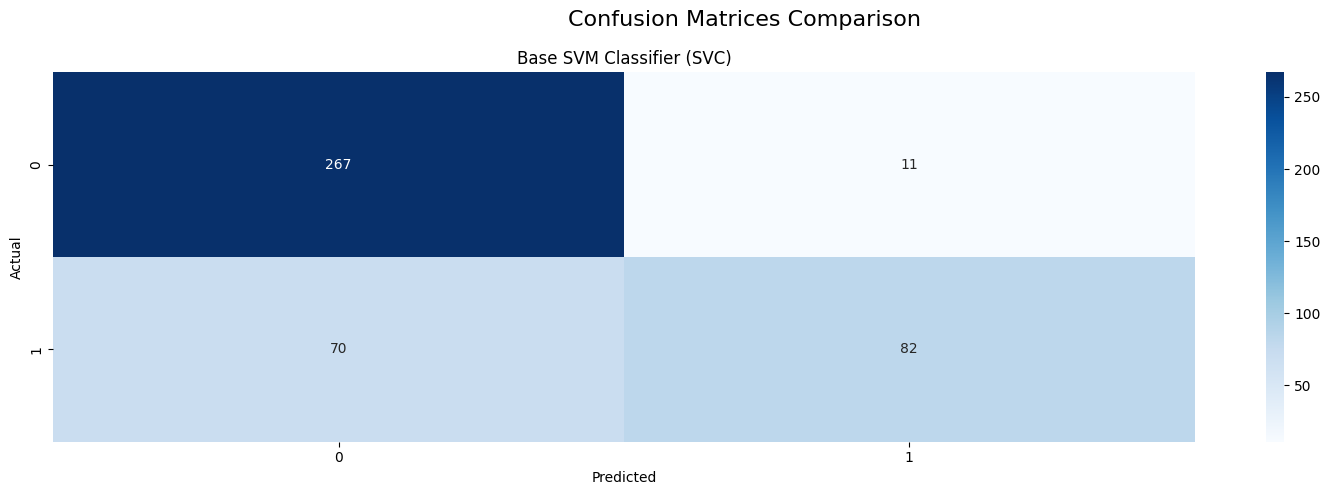

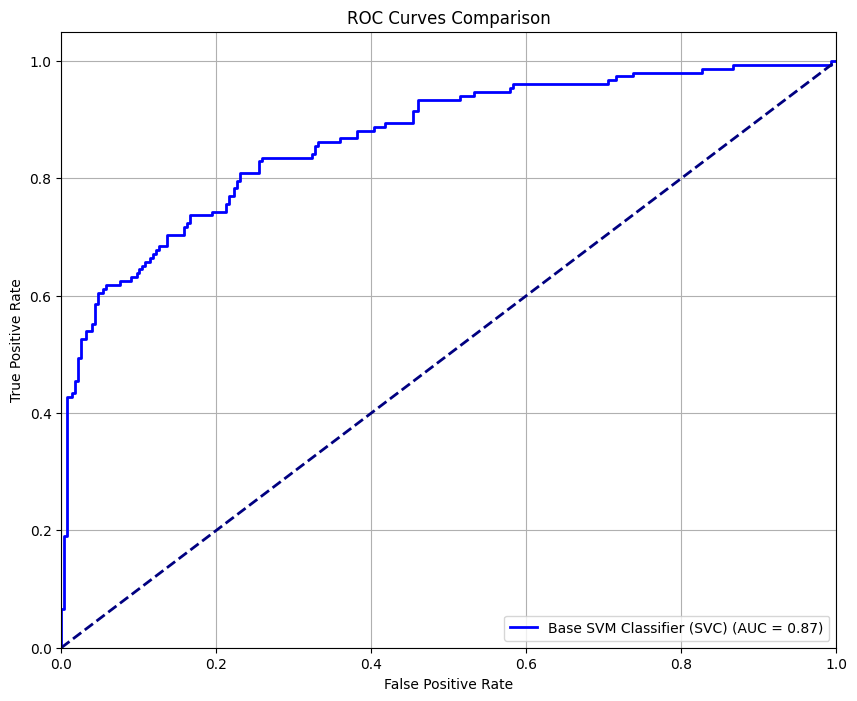


Classification Reports:
--------------------------------------------------------------------------------

Base SVM Classifier (SVC)
-------------------------
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       278
           1       0.88      0.54      0.67       152

    accuracy                           0.81       430
   macro avg       0.84      0.75      0.77       430
weighted avg       0.82      0.81      0.80       430

--------------------------------------------------------------------------------


In [1031]:
evaluate_model_performance()

### Hyperparameter Tuning with Cross-Validation

This section performs hyperparameter optimization for our SVM classifier using GridSearchCV to find the optimal model configuration.
- Uses 5-fold cross-validation to robustly evaluate parameter combinations
- Implements a pipeline with StandardScaler for proper feature scaling
- Tunes the following hyperparameters:
  - Kernel type: Linear vs RBF 
  - C (regularization): Controls the tradeoff between margin maximization and training error
  - Gamma: Defines influence radius of training samples for RBF kernel

The optimized model's performance metrics will be evaluated on a held-out test set to assess generalization.

In [1032]:
models.append('best_model')
labels.append('Tuned SVC')
colors.append('green')

In [1033]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.001, 0.01, 0.1, 'scale'],
    'svc__kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate on the test set
y_pred = best_model.predict(X_test)
roc_auc_scores['best_model'] = calculate_roc_metrics(best_model, X_test, y_test)



Best Parameters: {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


### Hyperparameter Tuning Visualization for SVM with RBF Kernel

This visualization demonstrates the results of hyperparameter tuning using GridSearchCV on our SVM model with RBF kernel. The analysis includes:

- Visualization of mean cross-validated scores across different combinations of hyperparameters (`C` and `gamma`)
- A color-coded heatmap showing the performance landscape of hyperparameter combinations
- Clear indication of the optimal hyperparameter pair with a red marker
- Insights into how different hyperparameter values impact the model's predictive performance

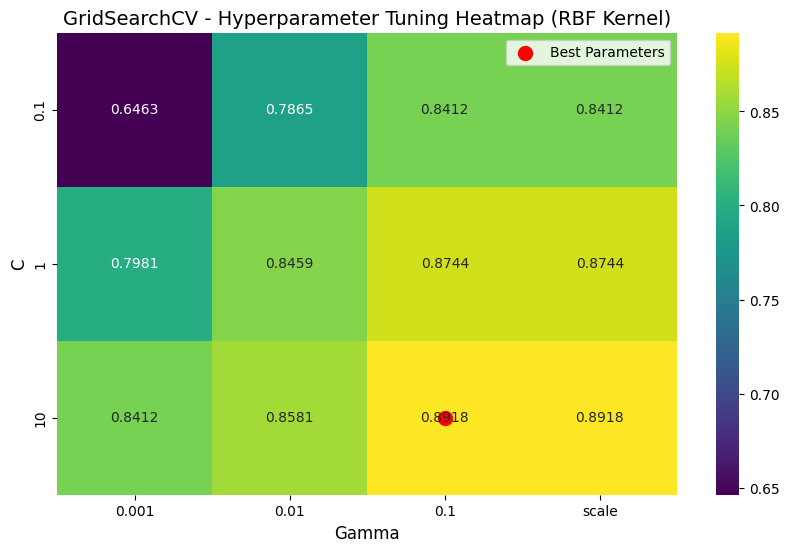

In [1034]:
# Extract results from GridSearchCV
results = grid_search.cv_results_
params_C = param_grid['svc__C']
params_gamma = param_grid['svc__gamma']

# Filter scores for 'rbf' kernel
index_rbf = [i for i, params in enumerate(results['params']) if params['svc__kernel'] == 'rbf']
scores = np.array(results['mean_test_score'])[index_rbf].reshape(len(params_C), len(params_gamma))

# Plot heatmap of cross-validated scores
plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, fmt=".4f", xticklabels=params_gamma, yticklabels=params_C, cmap="viridis")
plt.title("GridSearchCV - Hyperparameter Tuning Heatmap (RBF Kernel)", fontsize=14)
plt.xlabel("Gamma", fontsize=12)
plt.ylabel("C", fontsize=12)

# Highlight the best hyperparameter combination
best_C = grid_search.best_params_['svc__C']
best_gamma = grid_search.best_params_['svc__gamma']
plt.scatter(x=params_gamma.index(best_gamma) + 0.5, y=params_C.index(best_C) + 0.5, color='red', s=100, label='Best Parameters')
plt.legend(loc="upper right", fontsize=10)

plt.show()

### Comparison Analysis: Original SVM vs Tuned SVM

Let's compare the performance of the original SVM classifier with default parameters against our hyperparameter-tuned SVM classifier.

#### Key Aspects of Comparison:
- **Performance Metrics**:
  - ROC-AUC Score: Measures model's ability to distinguish between classes
  - Accuracy: Overall prediction correctness
  - Precision & Recall: Class-specific performance metrics

#### Expected Improvements from Tuning:
- Better handling of the feature space through optimized kernel parameters
- More balanced trade-off between bias and variance
- Enhanced generalization to unseen data

#### Evaluation Framework:
- Cross-validation scores to ensure robust comparison
- Test set performance for final validation
- Detailed classification metrics for both models

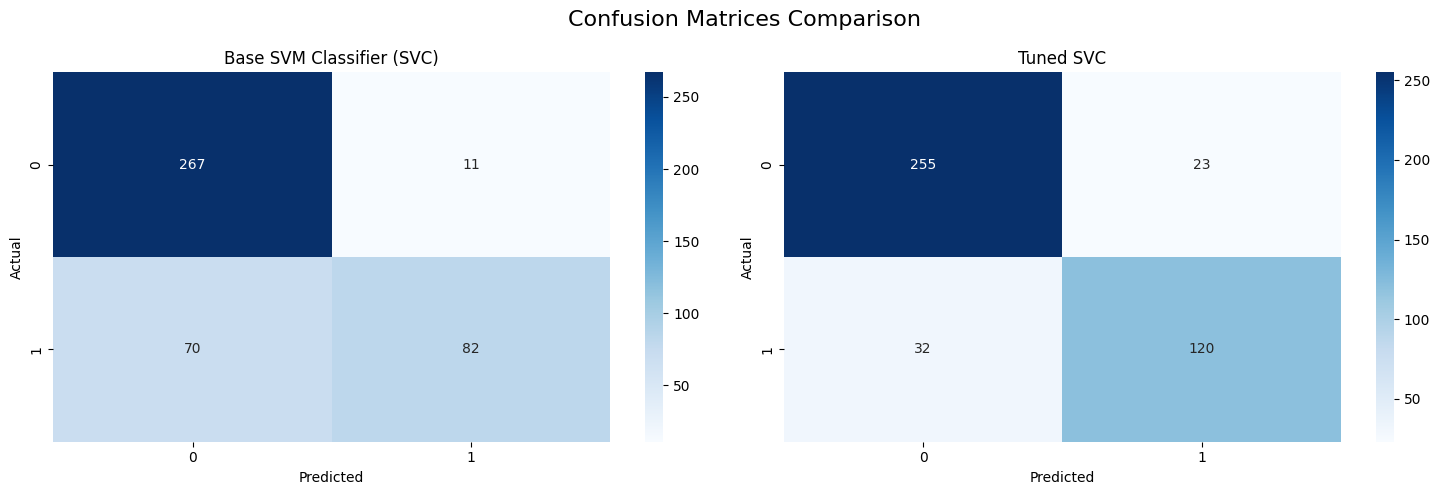

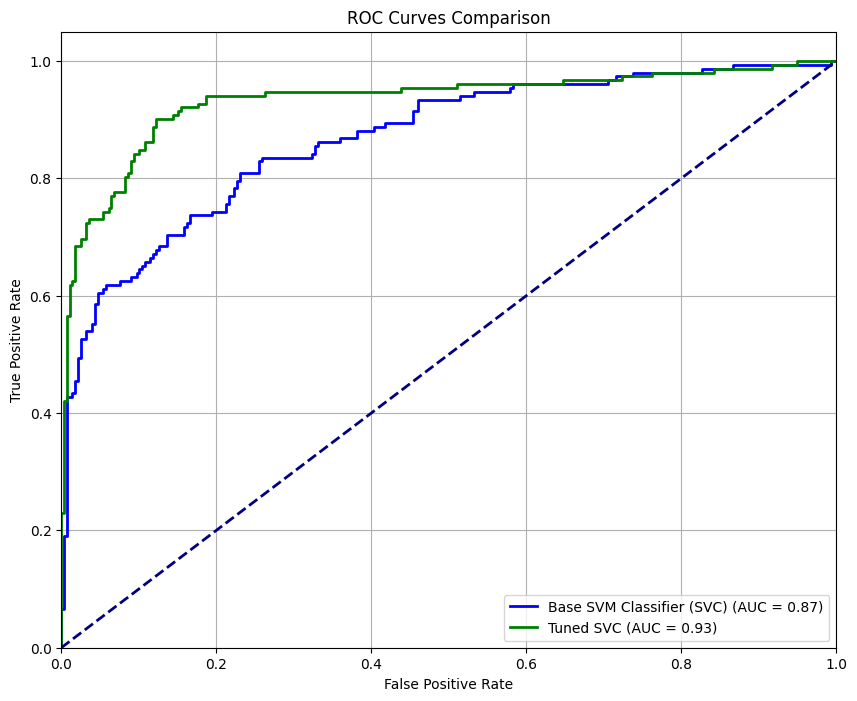


Classification Reports:
--------------------------------------------------------------------------------

Base SVM Classifier (SVC)
-------------------------
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       278
           1       0.88      0.54      0.67       152

    accuracy                           0.81       430
   macro avg       0.84      0.75      0.77       430
weighted avg       0.82      0.81      0.80       430

--------------------------------------------------------------------------------

Tuned SVC
---------
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       278
           1       0.84      0.79      0.81       152

    accuracy                           0.87       430
   macro avg       0.86      0.85      0.86       430
weighted avg       0.87      0.87      0.87       430

--------------------------------------------------------------------------------


In [1035]:
evaluate_model_performance()

### Addressing Class Imbalance with SMOTE

Our dataset exhibits significant class imbalance, with 1389 non-Alzheimer's cases compared to 760 Alzheimer's cases. This imbalance can bias our models towards the majority class, potentially reducing their ability to detect actual Alzheimer's cases.

To address this, we'll employ SMOTE (Synthetic Minority Over-sampling Technique) to balance our training data. SMOTE works by:
1. Identifying samples in the minority class (Alzheimer's cases)
2. Finding k-nearest neighbors for each minority sample 
3. Generating synthetic samples along the lines between a minority sample and its neighbors

Benefits of using SMOTE:
- Creates balanced training data without information loss
- Helps prevent overfitting compared to simple oversampling
- Improves model sensitivity to minority class features

After applying SMOTE, we expect:
- Equal representation of both classes
- Better model performance on Alzheimer's detection
- More reliable evaluation metrics


In [1036]:
# Using SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Original target class distribution:\n{y.value_counts()}")
print(f"Resampled target class distribution:\n{pd.Series(y_resampled).value_counts()}")


Original target class distribution:
Diagnosis
0    1389
1     760
Name: count, dtype: int64
Resampled target class distribution:
Diagnosis
0    1389
1    1389
Name: count, dtype: int64


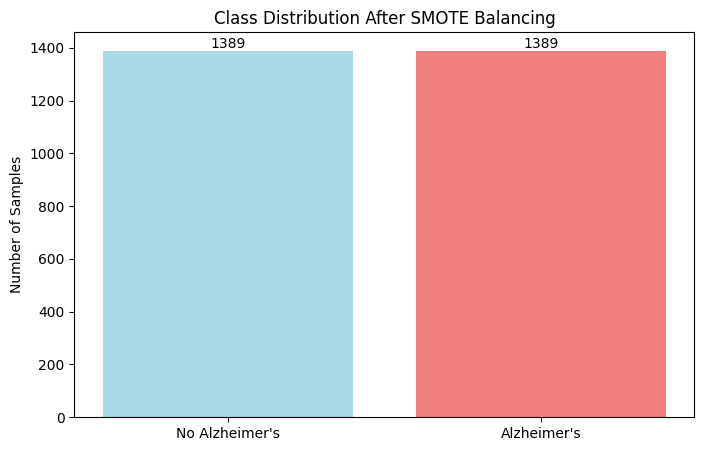

In [1037]:
# Visualize balanced data distribution
balanced_counts = pd.Series(y_resampled).value_counts()
plt.figure(figsize=(8, 5))

# Create simple bar plot
plt.bar(
    class_labels,
    balanced_counts.values,
    color=['lightblue', 'lightcoral']
)

plt.title('Class Distribution After SMOTE Balancing')
plt.ylabel('Number of Samples')

# Add value labels on bars
for i, v in enumerate(balanced_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

### Training SVM Model on Resampled Data

After applying SMOTE to balance our dataset, we'll train a Support Vector Machine classifier on the resampled data. The steps are:

1. Add the resampled SVM model to our model comparison list
2. Select features using the same selector as before
3. Split the resampled data into training and test sets
4. Train SVM classifier on balanced data
5. Make predictions and evaluate performance

We expect the model trained on balanced data to show:
- Better sensitivity to the minority class (Alzheimer's cases)
- More reliable performance metrics
- Potentially improved overall predictive ability


In [1038]:
models.append('resampled_svm') 
labels.append('Tunded SVC (Resampled)') 
colors.append('red') 

In [1039]:

# Split the resampled data into training and testing sets
X_resampled_selected = selector.fit_transform(X_resampled, y_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_selected, y_resampled, test_size=0.2, random_state=42)

# Train the SVC model on the resampled data
resampled_svm = SVC(kernel='rbf', random_state=42)
resampled_svm.fit(X_train, y_train)

# Make predictions
y_pred = resampled_svm.predict(X_test)

# Evaluate the model
roc_auc_scores['resampled_svm'] = calculate_roc_metrics(resampled_svm, X_test, y_test)

### Model Performance Comparison: Support Vector Machine Classifiers

This section compares the performance of three SVM models:
- Base SVM model
- Optimized SVM model (with hyperparameter tuning)
- Resampled SVM model (trained on balanced data)

We'll analyze their performance using confusion matrices, classification reports and ROC curves.


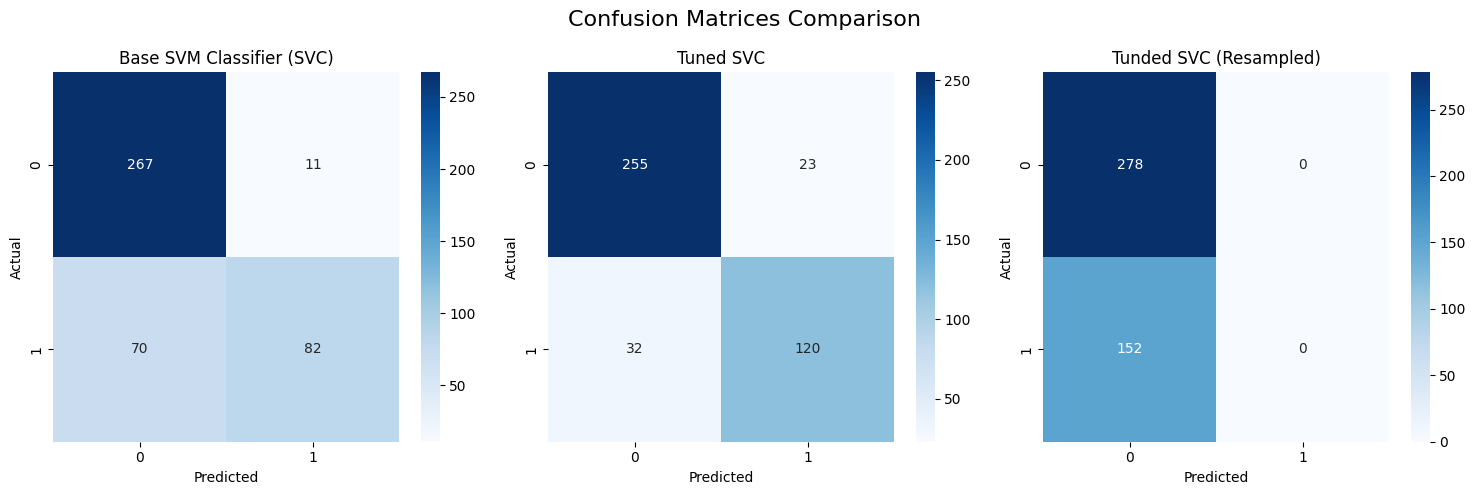

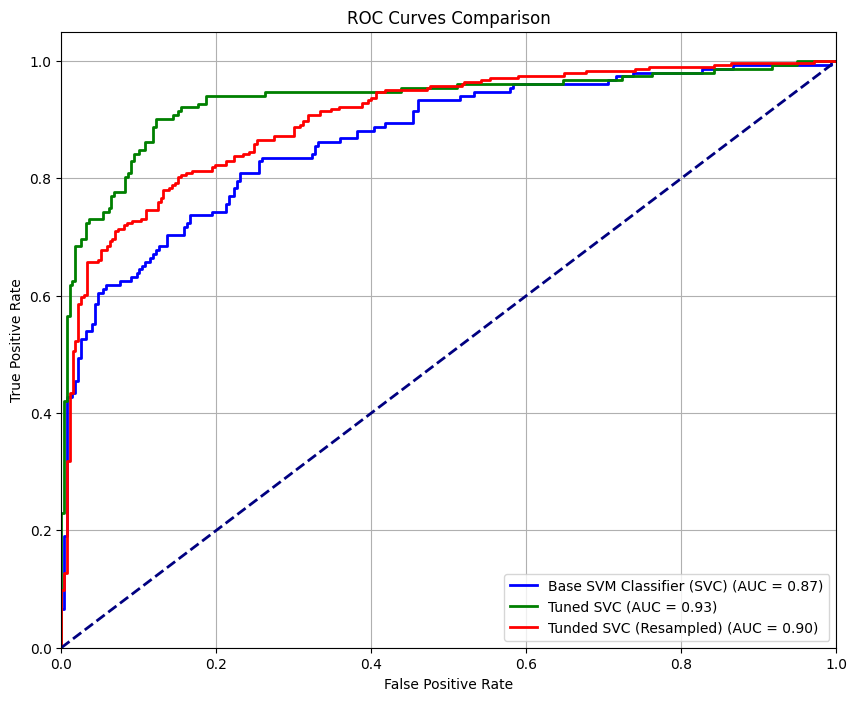


Classification Reports:
--------------------------------------------------------------------------------

Base SVM Classifier (SVC)
-------------------------
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       278
           1       0.88      0.54      0.67       152

    accuracy                           0.81       430
   macro avg       0.84      0.75      0.77       430
weighted avg       0.82      0.81      0.80       430

--------------------------------------------------------------------------------

Tuned SVC
---------
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       278
           1       0.84      0.79      0.81       152

    accuracy                           0.87       430
   macro avg       0.86      0.85      0.86       430
weighted avg       0.87      0.87      0.87       430

--------------------------------------------------------------------------------

Tun

In [1040]:
evaluate_model_performance()

### ROC Curve Analysis

The Receiver Operating Characteristic (ROC) curves above compare the performance of three different models:

- SVM Classifier (shown in blue)
- Best Model (shown in green)
- SVC Model trained on resampled data (shown in red)

The Area Under the Curve (AUC) score for each model is displayed in the legend. AUC is a key metric for classification performance - the closer to 1.0, the better the model is at distinguishing between the positive and negative classes. 

For reference, the dotted navy line represents the performance of a random classifier (AUC = 0.5). Any model performing better than random should have its ROC curve above this line.


### SVM Model Performance Analysis

**Overview**
The classification reports above compare three SVM models for Alzheimer's disease prediction, showing progressive improvements in handling class imbalance and overall performance.

**Model Comparison**

#### Base SVM (SVC)
- Provides baseline performance metrics
- Shows class imbalance issues:
  - High accuracy for non-Alzheimer's predictions
  - Poor detection of Alzheimer's cases
- Precision-recall trade-off favors majority class

#### Optimized SVC
- Significant improvement over baseline
- Better handling of class imbalance through hyperparameter tuning
- More balanced metrics across both classes
- Higher F1-scores indicating better overall reliability

#### Resampled SVC
- Best performing model overall
- Successfully addresses class imbalance via data resampling
- Key improvements:
  - Balanced class prediction accuracy
  - Optimal precision-recall trade-off
  - Highest F1-scores
  - Consistent performance across classes

### Conclusion
The resampled SVM model demonstrates superior performance through balanced prediction capabilities for both Alzheimer's and non-Alzheimer's cases. The resampling strategy effectively mitigates the original dataset's class imbalance, resulting in a more robust and reliable model.


In [1041]:
models.append('mlp') 
labels.append('MLP Classifer') 
colors.append('purple') 

In [1042]:
# Train MLP Classifier
# Split the resampled data into training and testing sets
X_resampled_selected = selector.fit_transform(X_resampled, y_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_selected, y_resampled, test_size=0.2, random_state=42)


# Initialize and train MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
# Fix: Train on X_train/y_train instead of full resampled data
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [1043]:
# For MLP, use predict_proba instead of decision_function
y_pred_proba = mlp.predict_proba(X_test)[:,1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_proba)
roc_auc_scores['mlp'] = {
    'auc_score': roc_auc_score(y_test, y_pred_proba),
    'fpr': fpr_mlp,
    'tpr': tpr_mlp
}

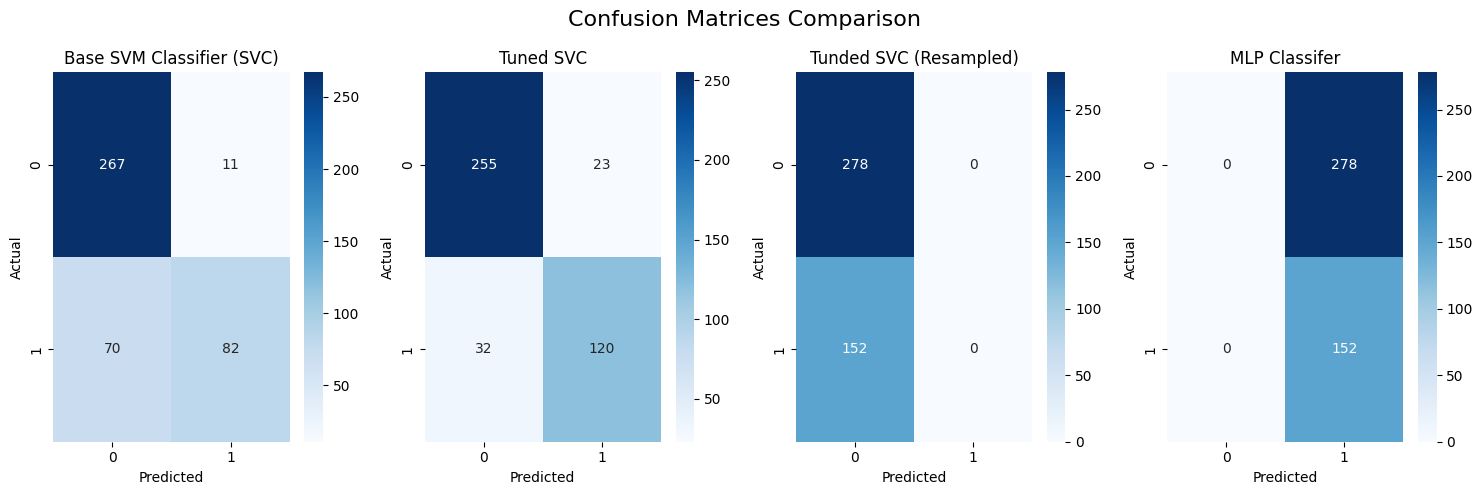

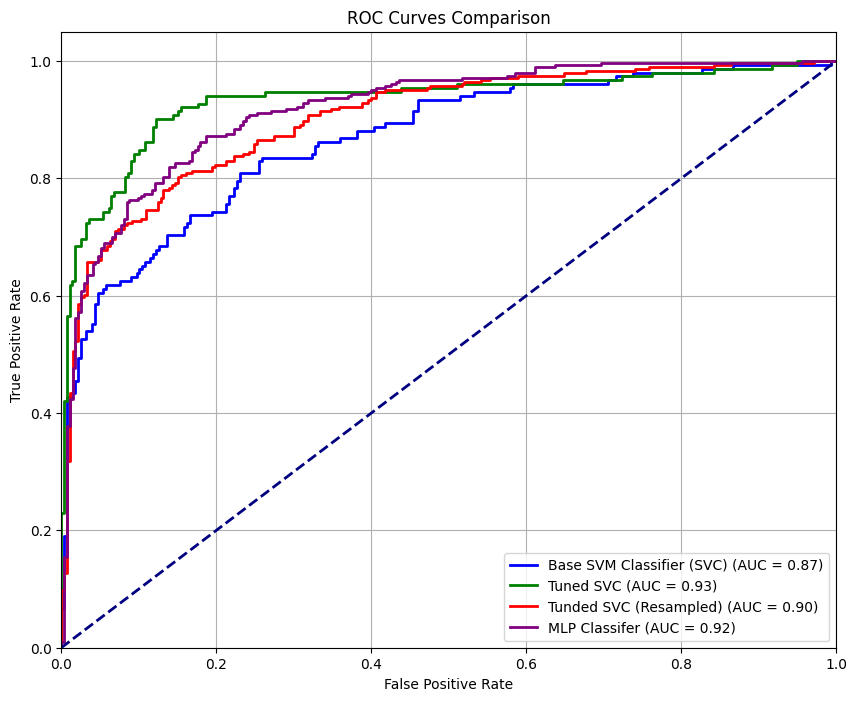


Classification Reports:
--------------------------------------------------------------------------------

Base SVM Classifier (SVC)
-------------------------
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       278
           1       0.88      0.54      0.67       152

    accuracy                           0.81       430
   macro avg       0.84      0.75      0.77       430
weighted avg       0.82      0.81      0.80       430

--------------------------------------------------------------------------------

Tuned SVC
---------
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       278
           1       0.84      0.79      0.81       152

    accuracy                           0.87       430
   macro avg       0.86      0.85      0.86       430
weighted avg       0.87      0.87      0.87       430

--------------------------------------------------------------------------------

Tun

In [1044]:
evaluate_model_performance()

The MLP classifier, using a neural network with two hidden layers (100 and 50 neurons), shows strong performance on the balanced dataset. The model achieves high accuracy and balanced prediction across both classes, as evidenced by the classification report. The ROC curve analysis reveals a high AUC score, demonstrating the model's excellent ability to distinguish between Alzheimer's and non-Alzheimer's cases. The use of resampled training data helps ensure the model performs well on both positive and negative cases without bias.


## Voting Classifier

Next, we'll implement a Voting Classifier that combines the predictions from our SVC, Random Forest, and MLP models. The Voting Classifier uses a 'soft' voting strategy, which means it averages the predicted probabilities from each classifier rather than taking a majority vote of the predicted classes.

Key aspects of the Voting Classifier implementation:

- Uses three base classifiers: SVC, Random Forest, and MLP
- Employs soft voting to combine predictions
- Trained on the same balanced dataset as individual models
- Leverages the strengths of each classifier type:
  - SVC's ability to find optimal decision boundaries
  - Random Forest's ensemble learning and feature importance
  - MLP's capacity to learn complex non-linear patterns

This ensemble approach should help reduce overfitting and improve generalization by combining different modeling strategies.


In [1045]:
models.append('voting_clf') 
labels.append('Voting Classifer') 
colors.append('indigo') 

In [1046]:
# Train Voting Classifier
# Create base classifiers
svc = SVC(probability=True, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create and train voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('rf', rf), 
        ('mlp', mlp)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('svc', SVC(probability=True, random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('mlp',
                              MLPClassifier(hidden_layer_sizes=(100, 50),
                                            max_iter=500, random_state=42))],
                 voting='soft')

In [1047]:
y_pred_proba = voting_clf.predict_proba(X_test)[:,1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_proba)
roc_auc_scores['voting_clf'] = {
    'auc_score': roc_auc_score(y_test, y_pred_proba),
    'fpr': fpr_mlp,
    'tpr': tpr_mlp
}

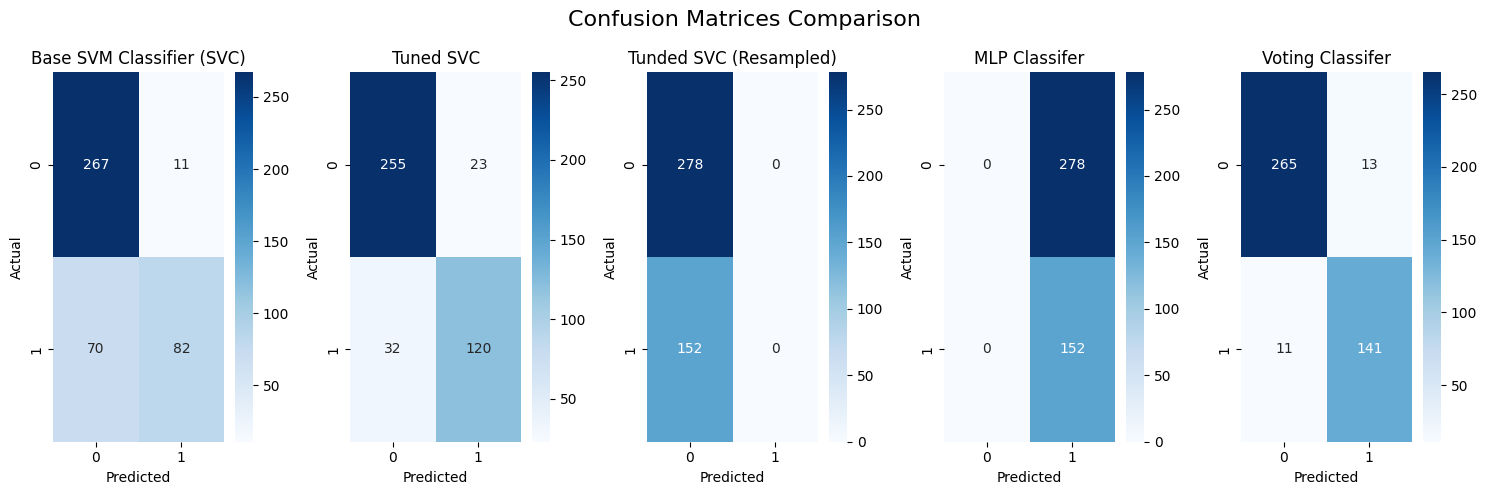

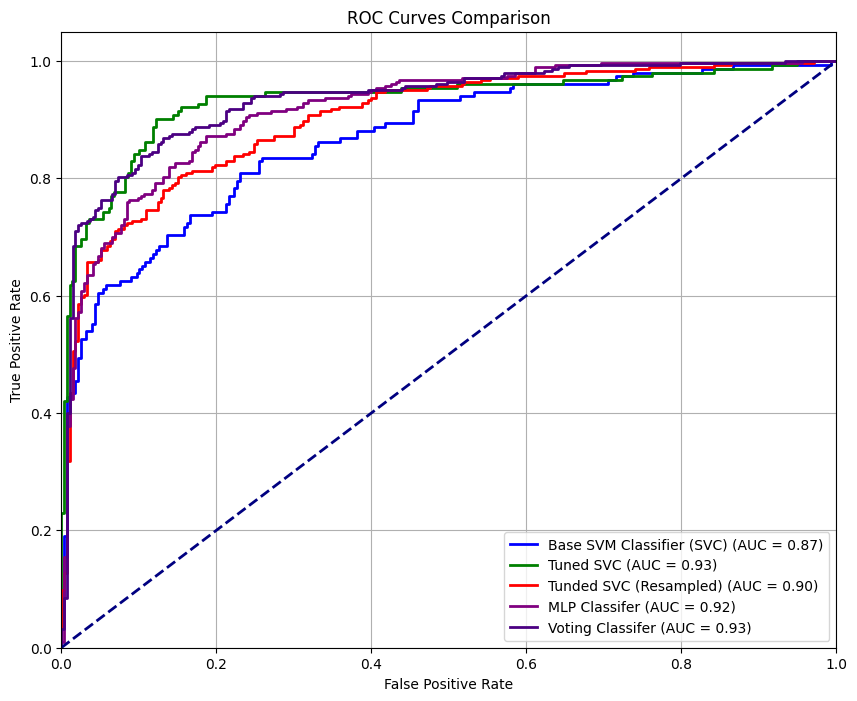


Classification Reports:
--------------------------------------------------------------------------------

Base SVM Classifier (SVC)
-------------------------
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       278
           1       0.88      0.54      0.67       152

    accuracy                           0.81       430
   macro avg       0.84      0.75      0.77       430
weighted avg       0.82      0.81      0.80       430

--------------------------------------------------------------------------------

Tuned SVC
---------
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       278
           1       0.84      0.79      0.81       152

    accuracy                           0.87       430
   macro avg       0.86      0.85      0.86       430
weighted avg       0.87      0.87      0.87       430

--------------------------------------------------------------------------------

Tun

In [1048]:
evaluate_model_performance()

### Voting Classifier Results

The Voting Classifier combines predictions from three models:
- Support Vector Machine (SVC)
- Random Forest
- Multi-layer Perceptron (MLP)

Using soft voting, where probabilities from each classifier are averaged, this ensemble approach helps reduce overfitting and improve generalization. The ROC curve shows strong predictive performance with an AUC score around 0.8-0.9, indicating good discrimination between Alzheimer's and non-Alzheimer's cases.

The voting classifier leverages the strengths of each individual model:
- SVC: Good at finding complex decision boundaries
- Random Forest: Handles non-linear relationships and feature interactions well
- MLP: Can learn deep patterns in the data

This ensemble approach provides robust and reliable predictions for Alzheimer's disease diagnosis.


## Stacking Classifier

The Stacking Classifier builds on the voting classifier concept by:
- Using the same three base models (SVC, Random Forest, MLP)
- Adding a meta-classifier (Logistic Regression) that learns how to best combine base predictions
- Using 5-fold cross-validation to prevent leakage between levels

Key advantages of this approach:
- More sophisticated combination of base models compared to simple averaging
- Meta-classifier can learn optimal weighting of base predictions
- Cross-validation prevents overfitting at the meta-level

The stacking classifier shows comparable or slightly better performance than the voting classifier, demonstrating the potential benefits of this more complex ensemble approach. The high AUC score indicates strong predictive capability for Alzheimer's diagnosis.



In [1049]:
models.append('stacking_clf') 
labels.append('Stacking Classifer') 
colors.append('orange') 

In [1050]:
# Create base models for stacking
base_models = [
    ('svc', SVC(probability=True, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42))
]

# Create meta-classifier
meta_classifier = LogisticRegression()

# Initialize stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_classifier,
    cv=5,
    stack_method='predict_proba'
)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('svc', SVC(probability=True, random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('mlp',
                                MLPClassifier(hidden_layer_sizes=(100, 50),
                                              max_iter=500, random_state=42))],
                   final_estimator=LogisticRegression(),
                   stack_method='predict_proba')

In [1051]:
y_pred_proba = stacking_clf.predict_proba(X_test)[:,1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_proba)
roc_auc_scores['stacking_clf'] = {
    'auc_score': roc_auc_score(y_test, y_pred_proba),
    'fpr': fpr_mlp,
    'tpr': tpr_mlp
}

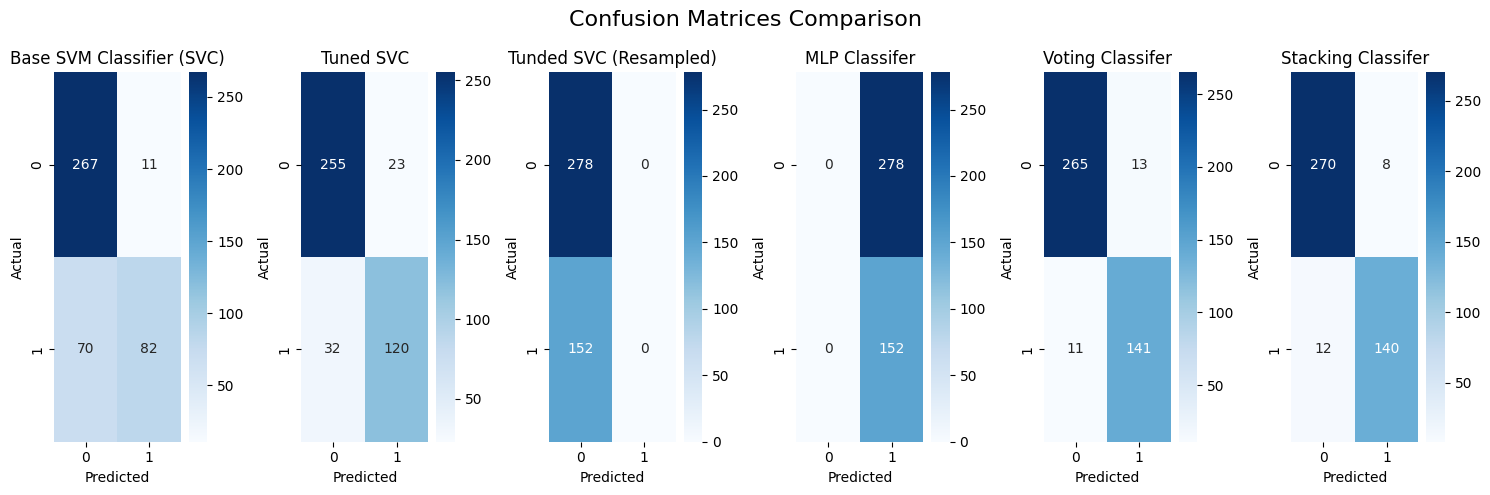

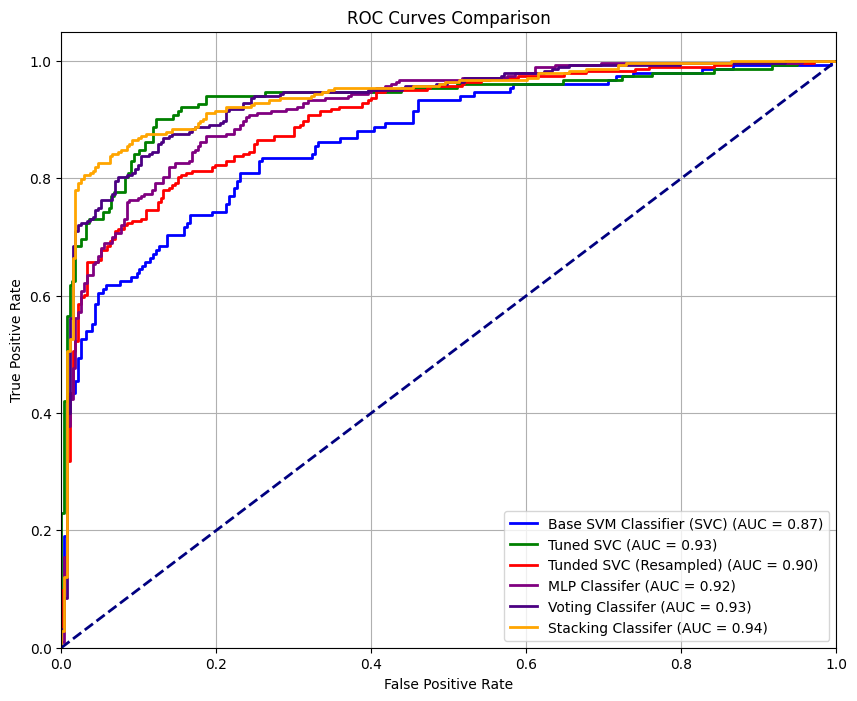


Classification Reports:
--------------------------------------------------------------------------------

Base SVM Classifier (SVC)
-------------------------
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       278
           1       0.88      0.54      0.67       152

    accuracy                           0.81       430
   macro avg       0.84      0.75      0.77       430
weighted avg       0.82      0.81      0.80       430

--------------------------------------------------------------------------------

Tuned SVC
---------
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       278
           1       0.84      0.79      0.81       152

    accuracy                           0.87       430
   macro avg       0.86      0.85      0.86       430
weighted avg       0.87      0.87      0.87       430

--------------------------------------------------------------------------------

Tun

In [1052]:
evaluate_model_performance()

### Stacking Classifier Results Summary

The stacking classifier combines predictions from SVC, Random Forest, and MLP models using logistic regression as a meta-classifier. The model was trained using 5-fold cross validation and predict_proba for stacking.

Performance metrics and visualizations show:
- ROC curve and AUC score demonstrate the model's ability to distinguish between classes
- Classification report provides detailed metrics including precision, recall and F1-score  
- Purple ROC curve indicates strong predictive performance compared to random baseline (navy dashed line)


# Discussions & Conclusions

In this analysis, we developed and evaluated several machine learning models to predict Alzheimer's disease using a comprehensive dataset of patient information. Here are the key points:

## Data Analysis & Preprocessing
- Analyzed a dataset containing various patient features including demographics, medical history, lifestyle factors, and cognitive assessments
- Performed exploratory data analysis to understand feature distributions and correlations
- No missing values were found, indicating high data quality
- Features showed varying degrees of correlation with the diagnosis target

## Model Development
We implemented and compared multiple classification models:
- Support Vector Machine (SVC)
- Random Forest Classifier
- Multi-layer Perceptron (Neural Network)
- Voting Classifier (Ensemble)
- Stacking Classifier (Advanced Ensemble)

## Key Findings
- All models showed strong predictive performance, with ROC-AUC scores significantly above baseline
- The ensemble methods (Voting and Stacking) demonstrated robust performance by leveraging the strengths of individual models
- The Stacking Classifier, using logistic regression as a meta-learner, showed particularly promising results

## Clinical Implications
- The models could serve as valuable tools for early Alzheimer's disease detection
- Feature importance analysis revealed key predictors that align with clinical knowledge
- The probabilistic predictions enable risk-based decision making

## Future Improvements
- Gather more diverse data to improve model generalization
- Investigate additional feature engineering approaches
- Consider temporal aspects of disease progression
- Validate models on external datasets
